### 8.1. 

\begin{eqnarray}
\frac{\partial S}{\partial t} & = & -k_1\times S\times E+k_2 \times ES\\
\frac{\partial E}{\partial t} & = & -k_1\times S\times E+(k_2+ k_3) \times ES\\
\frac{\partial ES}{\partial t} & = & k_1\times S\times E-k_2 \times ES-k_3 \times ES\\
\frac{\partial P}{\partial t} & = & k_3 \times ES\\
\end{eqnarray}

### 8.2. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,5)

In [5]:
def runge_kutta(E, S, ES, P, k1, k2, k3, h):
    k1_E = h*(-k1 * E * S+(k2+k3)*ES)
    k1_S = h*(-k1 * E * S+k2*ES)
    k1_ES = h*(k1 * E * S-k2*ES-k3*ES)
    k1_P = h*(k3*ES)

    k2_E = h*(-k1*(E+k1_E/2)*S+(k2+k3)*ES)
    k2_S = h*(-k1 * E* (S+k1_S/2)+k2*ES)
    k2_ES = h*(k1*E*S-(k2+k3)*(ES+k1_ES/2))
    k2_P = h*(k3*ES)

    k3_E = h*(-k1*(E+k2_E/2)*S+(k2+k3)*ES)
    k3_S = h*(-k1 * E* (S+k2_S/2)+k2*ES)
    k3_ES = h*(k1*E*S-(k2+k3)*(ES+k2_ES/2))
    k3_P = h*(k3*ES)

    k4_E = h*(-k1*(E+k3_E)*S+(k2+k3)*ES)
    k4_S = h*(-k1 * E* (S+k3_S)+k2*ES)
    k4_ES = h*(k1*E*S-(k2+k3)*(ES+k3_ES))
    k4_P = h*(k3*ES)

    E_new = E + (k1_E + 2*k2_E + 2*k3_E + k4_E)/6
    S_new = S + (k1_S + 2*k2_S + 2*k3_S + k4_S)/6
    ES_new = ES + (k1_ES + 2*k2_ES + 2*k3_ES + k4_ES)/6
    P_new = P + (k1_P + 2*k2_P + 2*k3_P + k4_P)/6

    return E_new, S_new, ES_new, P_new


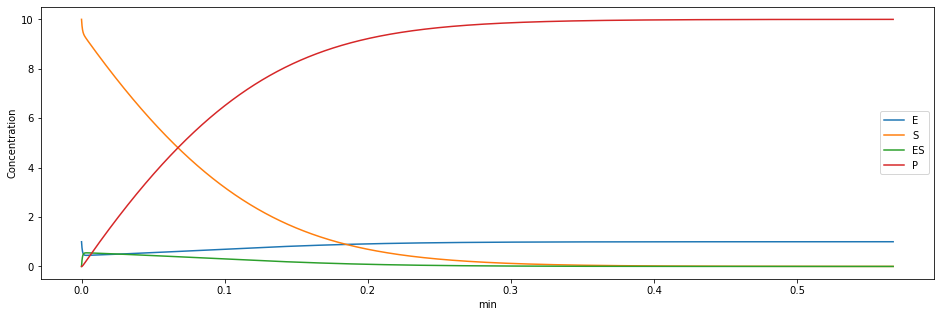

In [22]:
E = 1
S = 10
ES = 0
P = 0

k1 = 100#/uM/min
k2 = 600#/min
k3 = 150#/min

h =  1e-6

t = 0
t_values = [t]
E_values = [E]
S_values = [S]
ES_values = [ES]
P_values = [P]

while S_values[-1]>1e-3:
    E, S, ES, P = runge_kutta(E, S, ES, P, k1, k2, k3, h)
    t += h
    t_values.append(t)
    E_values.append(E)
    S_values.append(S)
    ES_values.append(ES)
    P_values.append(P)

# plot the concentrations as a function of time
plt.plot(t_values, E_values, label='E')
plt.plot(t_values, S_values, label='S')
plt.plot(t_values, ES_values, label='ES')
plt.plot(t_values, P_values, label='P')
plt.xlabel('min')
plt.ylabel('Concentration')
plt.legend()
plt.show()


### 8.3.

In [23]:
P_values_ = np.array(P_values)
V = np.concatenate([[0],(P_values_[1:]-P_values_[:-1])])/h

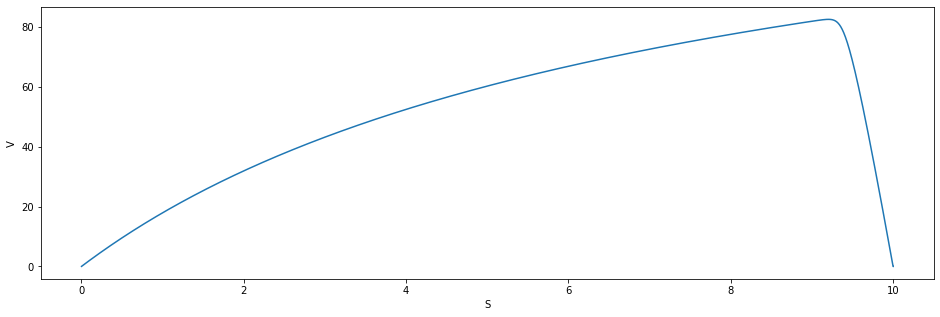

In [24]:
plt.plot(np.array(S_values),V)
plt.xlabel('S')
plt.ylabel('V')
plt.show()

In [26]:
V.max()

82.65267581289426

The maximum of the velocity is 82.65267581289426.